In [121]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [122]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Datei laden
df = pd.read_csv("C:\\Users\\ndqi9\\Downloads\\diamonds(1).csv", sep=",", index_col=0)  # ',' als Trennzeichen und die erste Spalte als Index
print(df.head())




   carat      cut color clarity  depth  table  price     x     y     z
1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


Häufigkeit für cut:


,Anzahl
cut,
Ideal,21551
Premium,13791
Very Good,12082
Good,4906
Fair,1610


Häufigkeit für color:


C:\Users\ndqi9\AppData\Local\Temp\ipykernel_22796\1990831229.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette="coolwarm")


,Anzahl
color,
G,11292
E,9797
F,9542
H,8304
D,6775
I,5422
J,2808


C:\Users\ndqi9\AppData\Local\Temp\ipykernel_22796\1990831229.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette="coolwarm")


Häufigkeit für clarity:


,Anzahl
clarity,
SI1,13065
VS2,12258
SI2,9194
VS1,8171
VVS2,5066
VVS1,3655
IF,1790
I1,741


C:\Users\ndqi9\AppData\Local\Temp\ipykernel_22796\1990831229.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette="coolwarm")


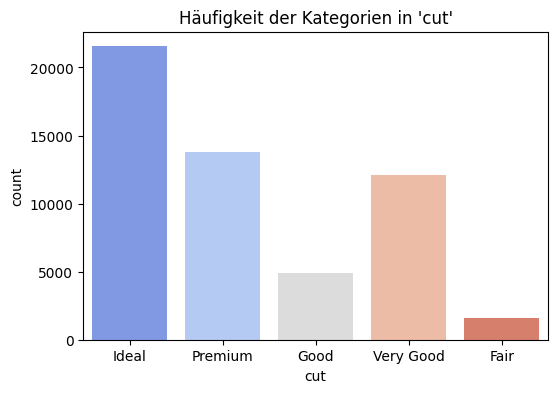

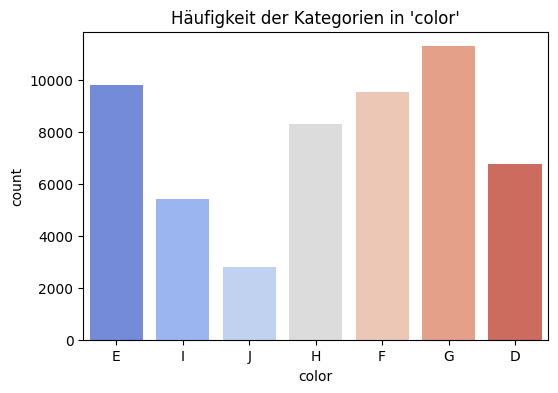

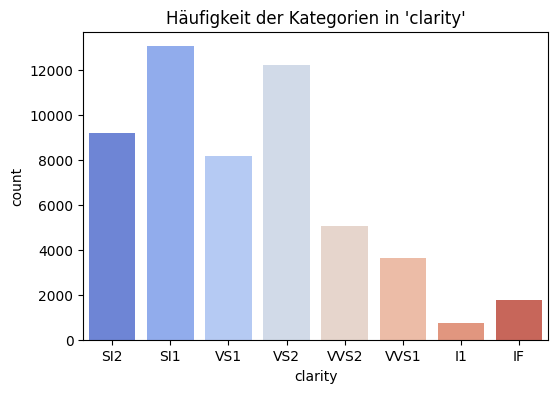

In [123]:
# Kategorische Werte 
categorical_features = ["cut", "color", "clarity"]

# Häufigkeiten analysieren
for feature in categorical_features:
    print(f"Häufigkeit für {feature}:")
    value_counts = df[feature].value_counts()

    # Das Folgende ist nur für die Formatierung
    styled_counts = value_counts.to_frame(name="Anzahl").style.highlight_max(axis=0, color="lightgreen").highlight_min(axis=0, color="lightcoral")
    display(styled_counts)  # Anzeige in Jupyter-Notebook

    # Kategorische Werte visuell darstellen mit Barplots
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=feature, palette="coolwarm")
    plt.title(f"Häufigkeit der Kategorien in '{feature}'")

In [124]:
# Info Datensatz
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [125]:
# Einheitlichkeit der Schreibweise, z.B. Fair <-> fair
df['cut'] = df['cut'].str.capitalize()
df['color'] = df['color'].str.upper()
df['clarity'] = df['clarity'].str.upper()


In [126]:
#Check for missing values/ Nach fehlenden Werten checken
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [127]:
# Häufigkeiten für alle kategorischen Werte
categorical_features = ["cut", "color", "clarity"]

for feature in categorical_features:
    print(f"Häufigkeit für {feature}:")
    value_counts = df[feature].value_counts()

    # Formatierte und stilisierte Tabelle
    styled_counts = value_counts.to_frame(name="Anzahl").style.highlight_max(axis=0, color="lightgreen").highlight_min(axis=0, color="lightcoral")
    display(styled_counts)  # Verwende display(), um die Tabelle in Jupyter anzuzeigen

Häufigkeit für cut:


,Anzahl
cut,
Ideal,21551
Premium,13791
Very good,12082
Good,4906
Fair,1610


Häufigkeit für color:


,Anzahl
color,
G,11292
E,9797
F,9542
H,8304
D,6775
I,5422
J,2808


Häufigkeit für clarity:


,Anzahl
clarity,
SI1,13065
VS2,12258
SI2,9194
VS1,8171
VVS2,5066
VVS1,3655
IF,1790
I1,741


In [128]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


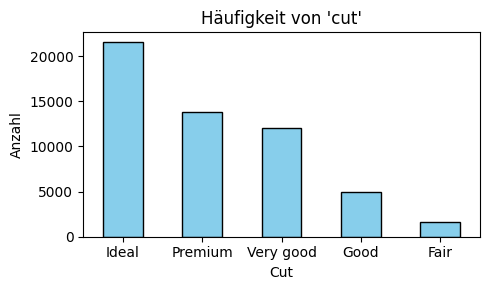

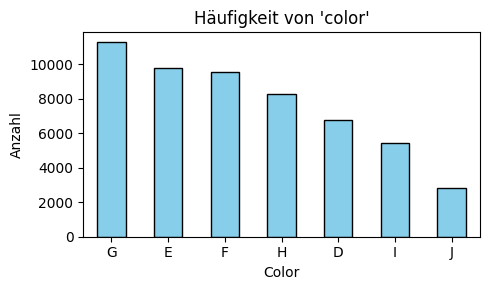

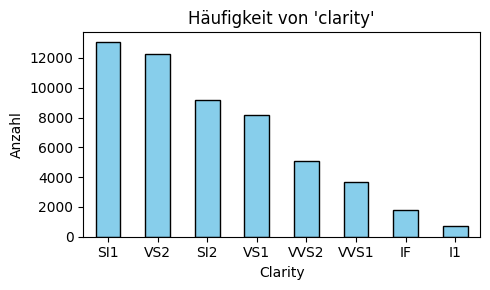

In [ ]:
#Balkendaigramme für kategorische Werte / Kateg. Werte visuell darstellen
import matplotlib.pyplot as plt

categorical_features = ['cut', 'color', 'clarity']

for feature in categorical_features:
    df[feature].value_counts().plot(kind='bar', figsize=(5, 3), title=f"Häufigkeit von '{feature}'", color='skyblue', edgecolor='black')
    plt.xlabel(feature.capitalize())  # X-Achse benennen
    plt.ylabel("Anzahl")             # Y-Achse benennen
    plt.xticks(rotation=0)           # Kategorien horizontal anzeigen
    plt.tight_layout()               # Verhindert abgeschnittene Beschriftungen
    plt.show()



In [ ]:
# Statistische Zusammenfassung für numerische Features

numerical_features = ["carat", "depth", "table", "price", "x", "y", "z"]
summary_stats = df[numerical_features].describe()

# Folgendes ist nur für Format und Stil
styled_summary = summary_stats.style.format(precision=2).highlight_max(axis=0, color="lightgreen").highlight_min(axis=0, color="lightcoral")
styled_summary

,carat,depth,table,price,x,y,z
count,53940.00,53940.00,53940.00,53940.00,53940.00,53940.00,53940.00
mean,0.80,61.75,57.46,3932.80,5.73,5.73,3.54
std,0.47,1.43,2.23,3989.44,1.12,1.14,0.71
min,0.20,43.00,43.00,326.00,0.00,0.00,0.00
25%,0.40,61.00,56.00,950.00,4.71,4.72,2.91
50%,0.70,61.80,57.00,2401.00,5.70,5.71,3.53
75%,1.04,62.50,59.00,5324.25,6.54,6.54,4.04
max,5.01,79.00,95.00,18823.00,10.74,58.90,31.80


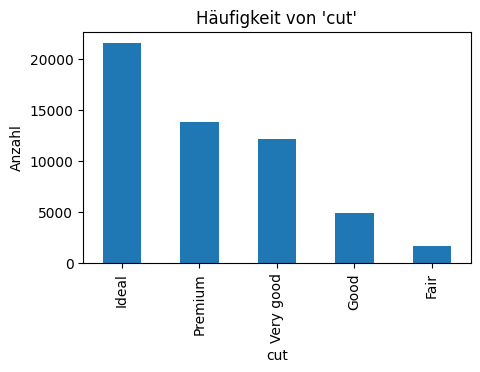

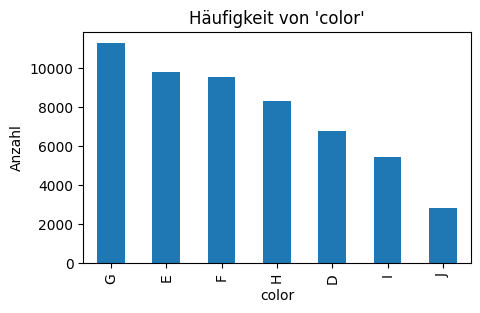

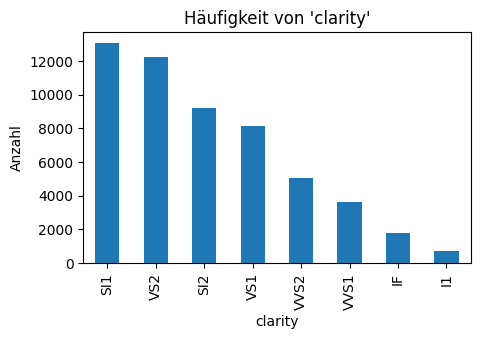

In [166]:
# Liste der kategorischen Features generieren und drüber iterieren
categorical_features = ['cut', 'color', 'clarity']

# Balkendiagramme für jedes kategorische Feature
for feature in categorical_features:
    df[feature].value_counts().plot(kind='bar', figsize=(5, 3))
    plt.title(f"Häufigkeit von '{feature}'")
    plt.xlabel(feature)
    plt.ylabel("Anzahl")
    plt.show()



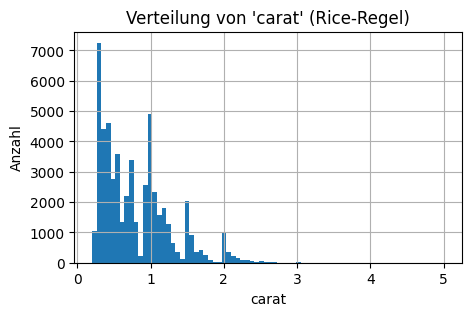

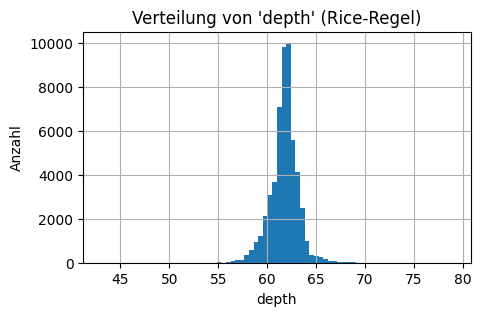

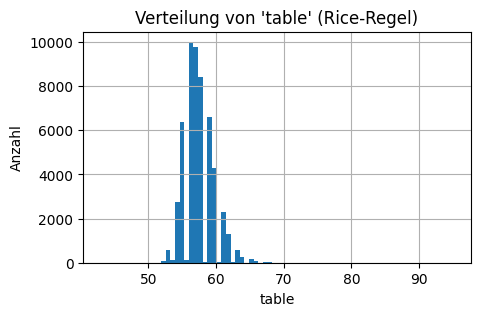

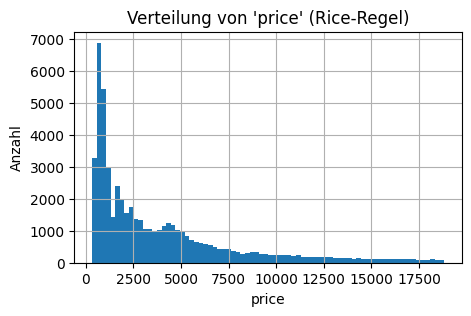

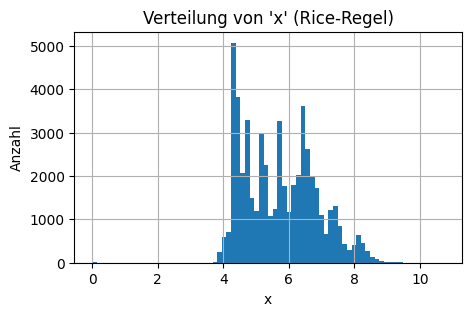

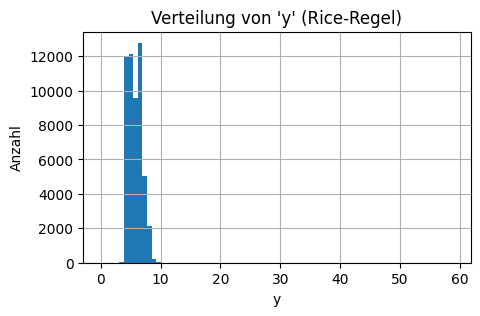

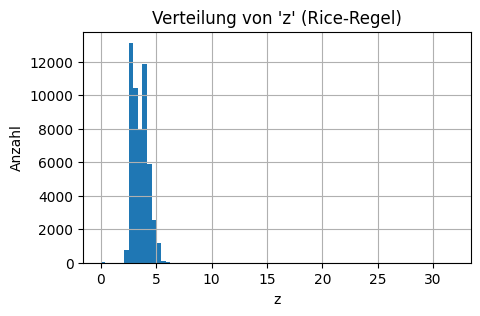

In [132]:
# Liste der numerischen Features
numerical_features = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

# Histogramm -> hier ist Rice-Regel von Vorteil für jedes numerische Feature
for feature in numerical_features:
    df[feature].hist(bins="rice", figsize=(5, 3))
    plt.title(f"Verteilung von '{feature}' (Rice-Regel)")
    plt.xlabel(feature)
    plt.ylabel("Anzahl")
    plt.show()



In [ ]:
# Zusammenfassung der numerischen Daten
summary_stats = df.describe()

# Folgendes nur für Format und Stil
styled_summary = summary_stats.style.format(precision=2).highlight_max(axis=0, color="lightgreen").highlight_min(axis=0, color="lightcoral")
styled_summary




,carat,depth,table,price,x,y,z
count,53940.00,53940.00,53940.00,53940.00,53940.00,53940.00,53940.00
mean,0.80,61.75,57.46,3932.80,5.73,5.73,3.54
std,0.47,1.43,2.23,3989.44,1.12,1.14,0.71
min,0.20,43.00,43.00,326.00,0.00,0.00,0.00
25%,0.40,61.00,56.00,950.00,4.71,4.72,2.91
50%,0.70,61.80,57.00,2401.00,5.70,5.71,3.53
75%,1.04,62.50,59.00,5324.25,6.54,6.54,4.04
max,5.01,79.00,95.00,18823.00,10.74,58.90,31.80


In [ ]:
# Kategorische Features miteinander vergleichen
# Im Skript gibt es zwei Wege um kateg. Werte mteinander zu vergleichen. Für unsere Aufgabenstellung macht die Kreuztabellen-Methode (crosstab)
# Sinn
crosstab_cut_color = pd.crosstab(df['cut'], df['color'])
crosstab_cut_clarity = pd.crosstab(df['cut'], df['clarity'])
crosstab_color_clarity = pd.crosstab(df['color'], df['clarity'])

print("Kreuztabelle zwischen 'cut' und 'color':\n", crosstab_cut_color)
print("\nKreuztabelle zwischen 'cut' und 'clarity':\n", crosstab_cut_clarity)
print("\nKreuztabelle zwischen 'color' und 'clarity':\n", crosstab_color_clarity)


Kreuztabelle zwischen 'cut' und 'color':
 color         D     E     F     G     H     I    J
cut                                               
Fair        163   224   312   314   303   175  119
Good        662   933   909   871   702   522  307
Ideal      2834  3903  3826  4884  3115  2093  896
Premium    1603  2337  2331  2924  2360  1428  808
Very good  1513  2400  2164  2299  1824  1204  678

Kreuztabelle zwischen 'cut' und 'clarity':
 clarity     I1    IF   SI1   SI2   VS1   VS2  VVS1  VVS2
cut                                                     
Fair       210     9   408   466   170   261    17    69
Good        96    71  1560  1081   648   978   186   286
Ideal      146  1212  4282  2598  3589  5071  2047  2606
Premium    205   230  3575  2949  1989  3357   616   870
Very good   84   268  3240  2100  1775  2591   789  1235

Kreuztabelle zwischen 'color' und 'clarity':
 clarity   I1   IF   SI1   SI2   VS1   VS2  VVS1  VVS2
color                                                
D 

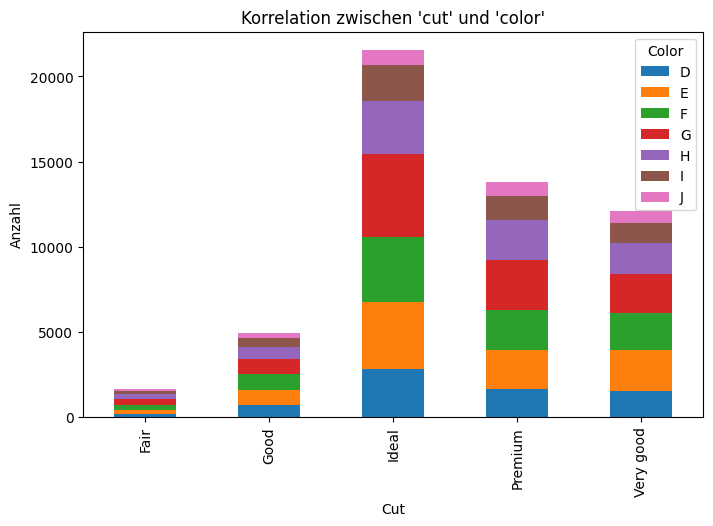

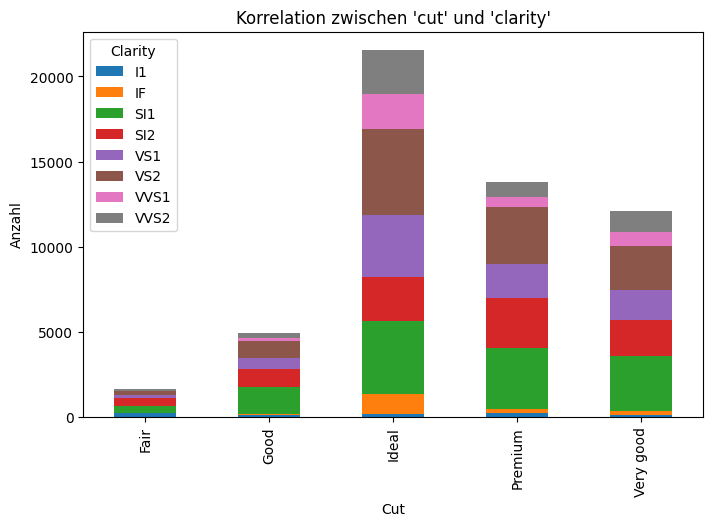

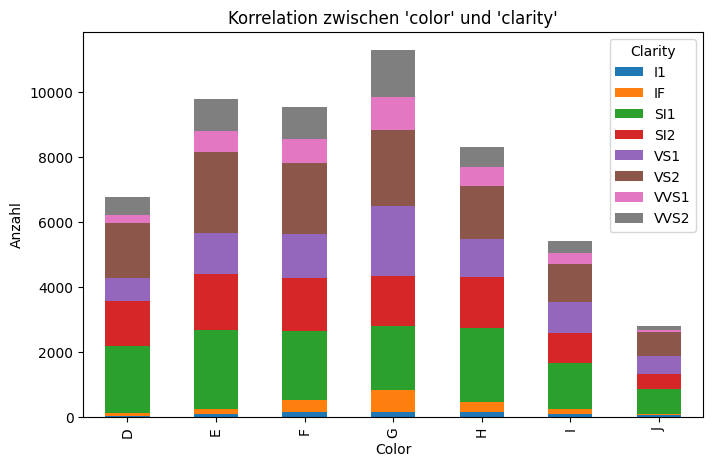

In [135]:
import matplotlib.pyplot as plt

# Gestapeltes Balkendiagramm für Cut und Color
crosstab_cut_color.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title("Korrelation zwischen 'cut' und 'color'")
plt.xlabel("Cut")
plt.ylabel("Anzahl")
plt.legend(title="Color")
plt.show()

# Gestapeltes Balkendiagramm für Cut und Clarity
crosstab_cut_clarity.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title("Korrelation zwischen 'cut' und 'clarity'")
plt.xlabel("Cut")
plt.ylabel("Anzahl")
plt.legend(title="Clarity")
plt.show()

# Gestapeltes Balkendiagramm für Color und Clarity
crosstab_color_clarity.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title("Korrelation zwischen 'color' und 'clarity'")
plt.xlabel("Color")
plt.ylabel("Anzahl")
plt.legend(title="Clarity")
plt.show()


In [136]:
crosstab_cut_color.to_csv("cut_vs_color.csv")
crosstab_cut_clarity.to_csv("cut_vs_clarity.csv")
crosstab_color_clarity.to_csv("color_vs_clarity.csv")


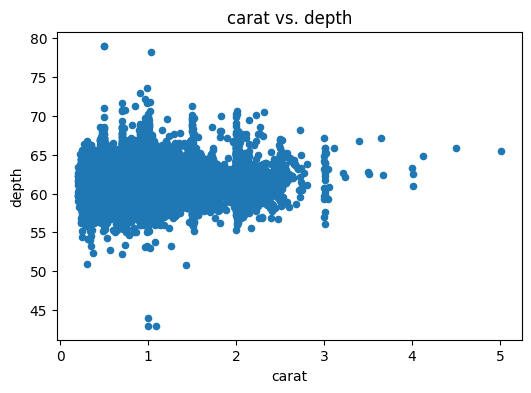

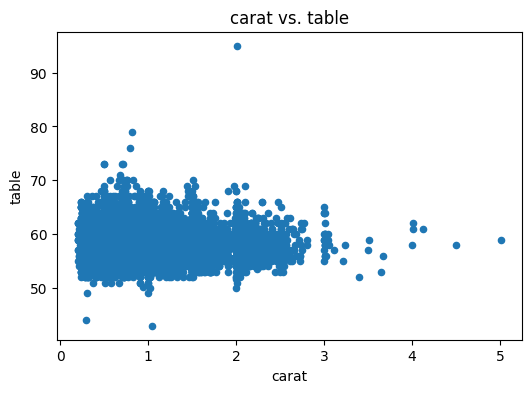

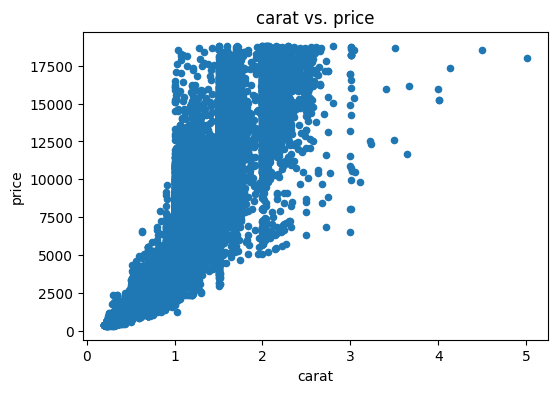

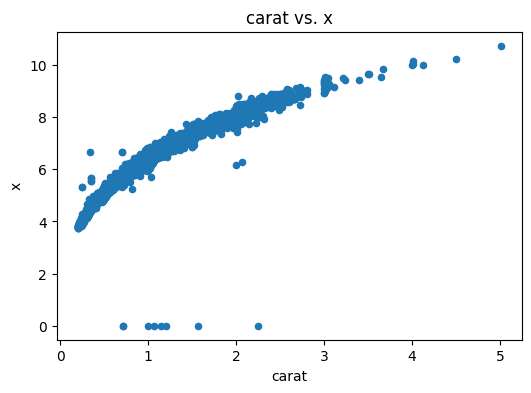

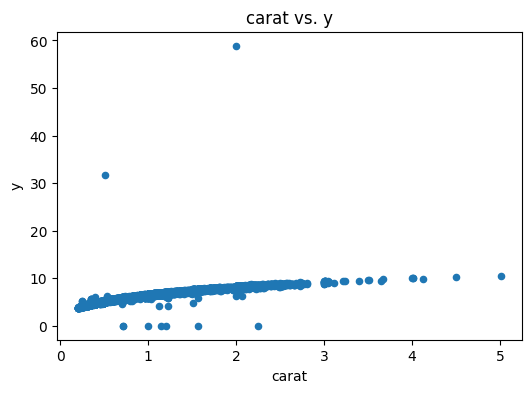

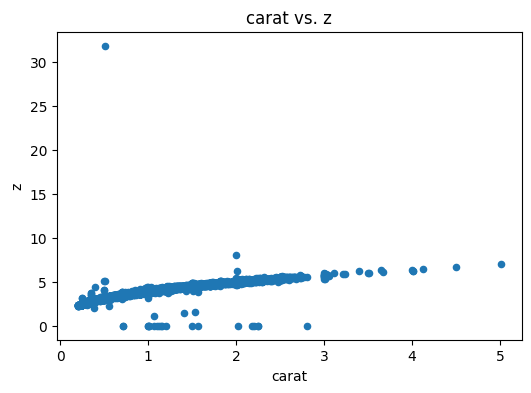

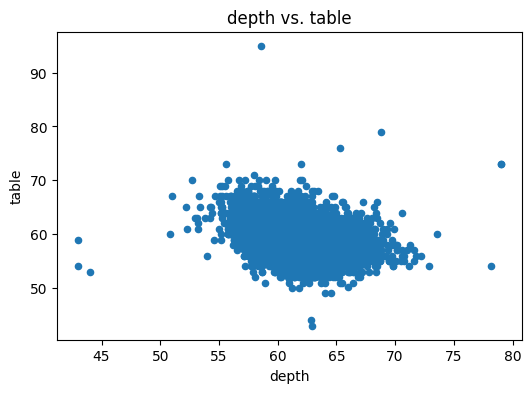

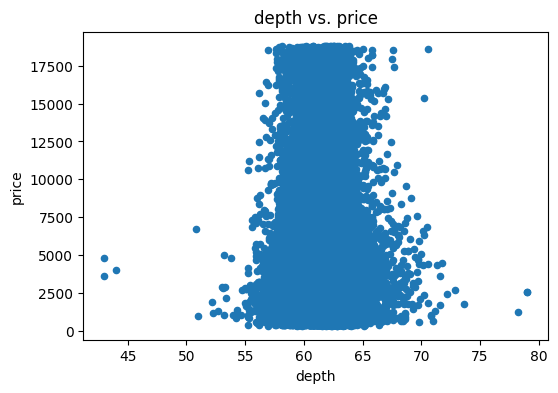

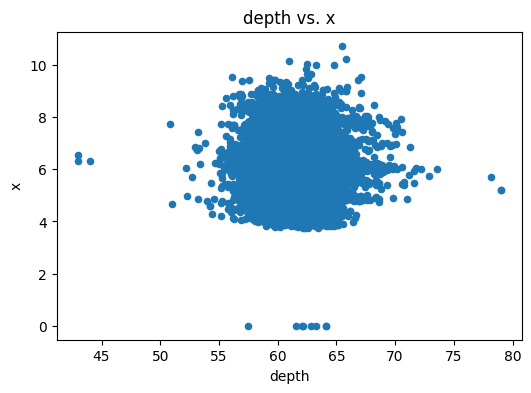

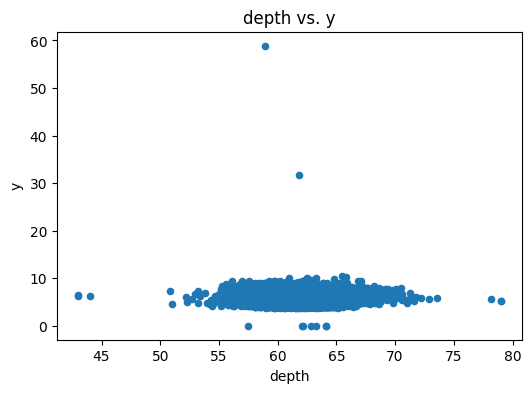

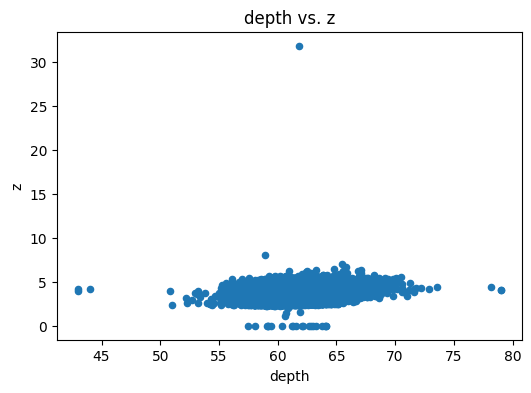

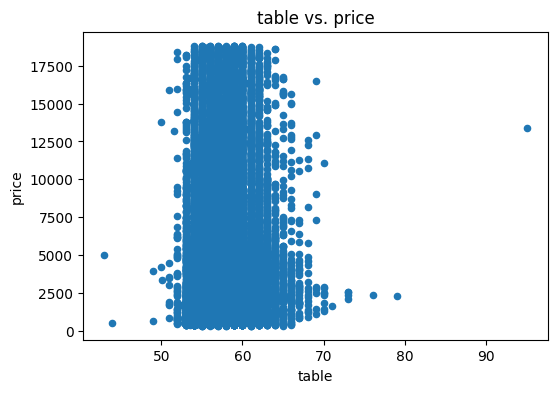

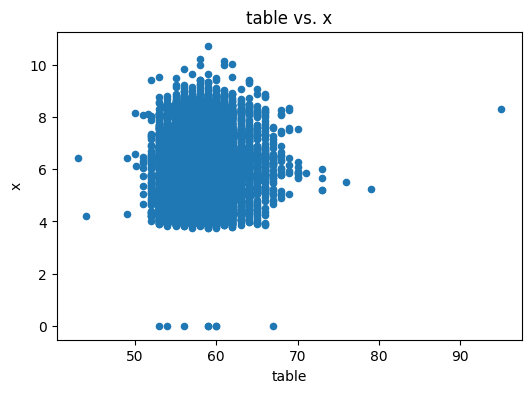

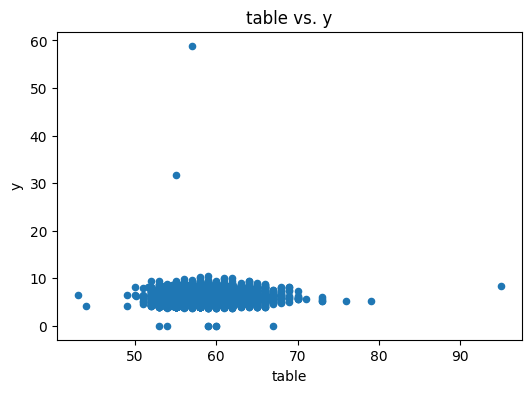

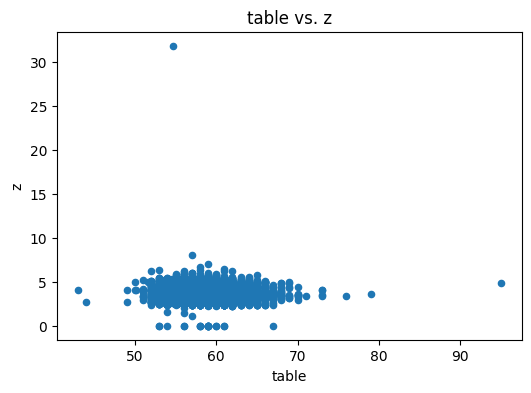

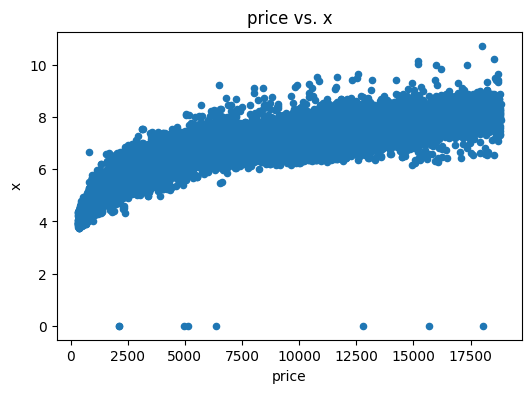

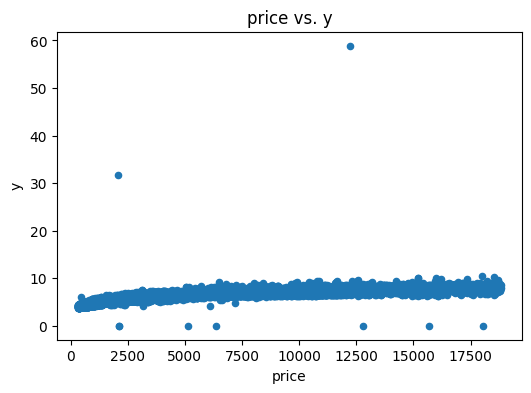

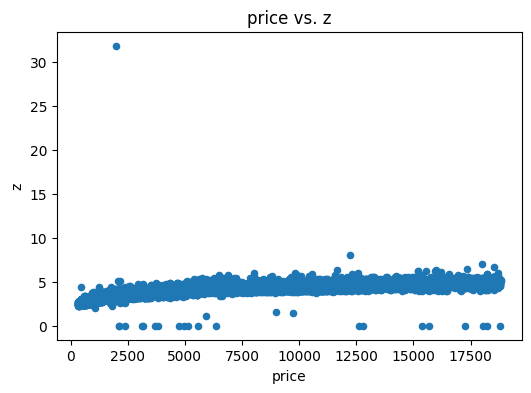

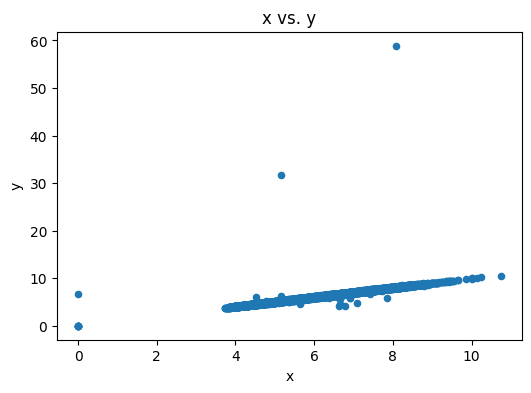

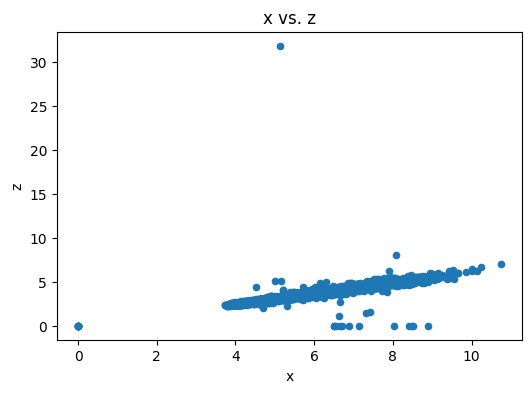

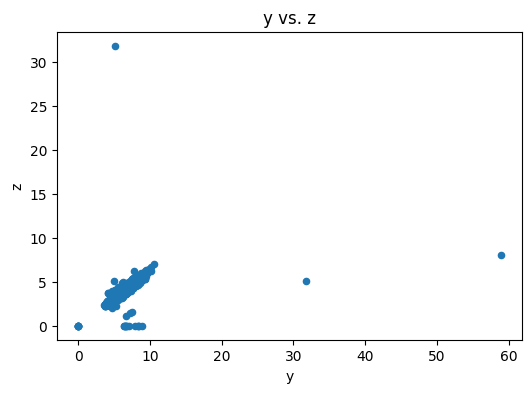

In [137]:
#Quantitative Werte mit Quantitativen Werten vergleichen

quantitative_features = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

# Scatterplots für jede Kombination
for i, feature_x in enumerate(quantitative_features):
    for j, feature_y in enumerate(quantitative_features):
        if i < j:  # Vermeidung von doppelten Kombinationen
            df.plot.scatter(x=feature_x, y=feature_y, figsize=(6, 4))
            plt.title(f"{feature_x} vs. {feature_y}")
            plt.show()


In [138]:
# Korrelationstabelle für numerische Features -> Wie hängen numerische Features miteinander zusammen
# Werte zwischen -1 und +1: 
# +1: Starke positive Korrelation (beide Werte steigen gemeinsam).
# -1: Starke negative Korrelation (ein Wert steigt, der andere sinkt).
# 0: Keine lineare Korrelation.

# Nur numerische Spalten auswählen
numerical_features = df.select_dtypes(include=['float64', 'int64'])

# Korrelationstabelle berechnen
correlation_matrix = numerical_features.corr(method='pearson')
print("Korrelationstabelle:\n", correlation_matrix)


Korrelationstabelle:
           carat     depth     table     price         x         y         z
carat  1.000000  0.028224  0.181618  0.921591  0.975094  0.951722  0.953387
depth  0.028224  1.000000 -0.295779 -0.010647 -0.025289 -0.029341  0.094924
table  0.181618 -0.295779  1.000000  0.127134  0.195344  0.183760  0.150929
price  0.921591 -0.010647  0.127134  1.000000  0.884435  0.865421  0.861249
x      0.975094 -0.025289  0.195344  0.884435  1.000000  0.974701  0.970772
y      0.951722 -0.029341  0.183760  0.865421  0.974701  1.000000  0.952006
z      0.953387  0.094924  0.150929  0.861249  0.970772  0.952006  1.000000


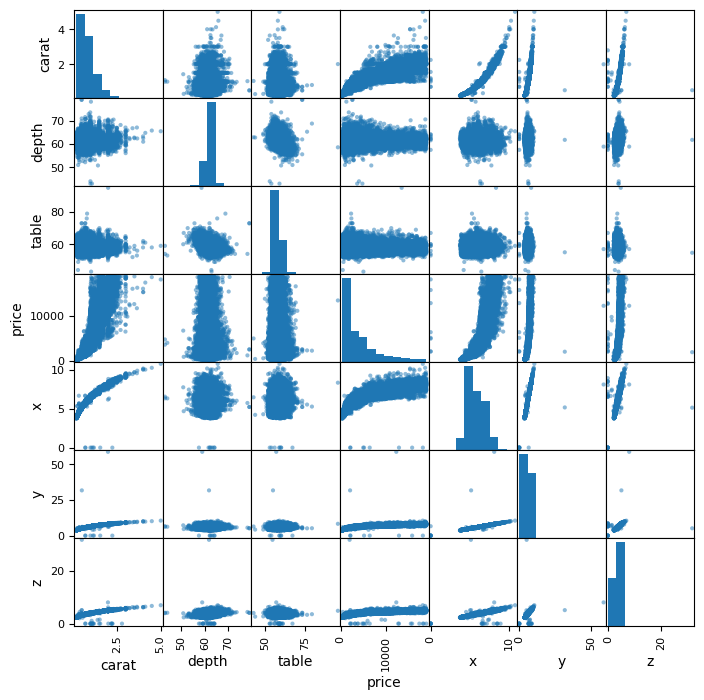

In [139]:
from pandas.plotting import scatter_matrix

# Scatter-Matrix für alle quantitativen Features
scatter_matrix(df[quantitative_features], figsize=(8, 8), diagonal='hist')
plt.show()


In [140]:
# Zusammenfassung der Preisdaten pro `cut`
print(df.groupby('cut')['price'].describe())

# Zusammenfassung der Preisdaten pro `color`
print(df.groupby('color')['price'].describe())

# Zusammenfassung der Preisdaten pro `clarity`
print(df.groupby('clarity')['price'].describe())


             count         mean          std    min      25%     50%      75%  \
cut                                                                             
Fair        1610.0  4358.757764  3560.386612  337.0  2050.25  3282.0  5205.50   
Good        4906.0  3928.864452  3681.589584  327.0  1145.00  3050.5  5028.00   
Ideal      21551.0  3457.541970  3808.401172  326.0   878.00  1810.0  4678.50   
Premium    13791.0  4584.257704  4349.204961  326.0  1046.00  3185.0  6296.00   
Very good  12082.0  3981.759891  3935.862161  336.0   912.00  2648.0  5372.75   

               max  
cut                 
Fair       18574.0  
Good       18788.0  
Ideal      18806.0  
Premium    18823.0  
Very good  18818.0  
         count         mean          std    min     25%     50%      75%  \
color                                                                      
D       6775.0  3169.954096  3356.590935  357.0   911.0  1838.0  4213.50   
E       9797.0  3076.752475  3344.158685  326.0   882.0  

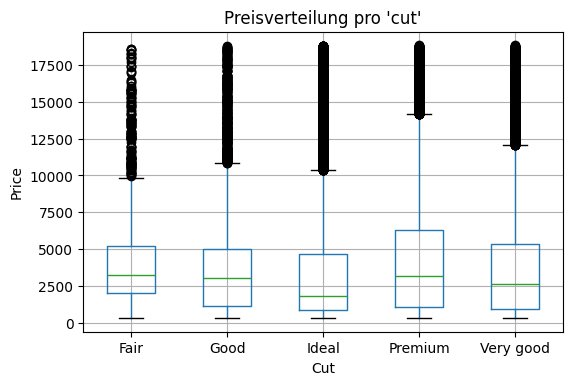

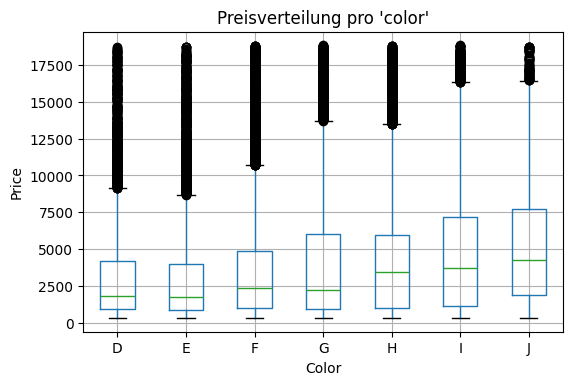

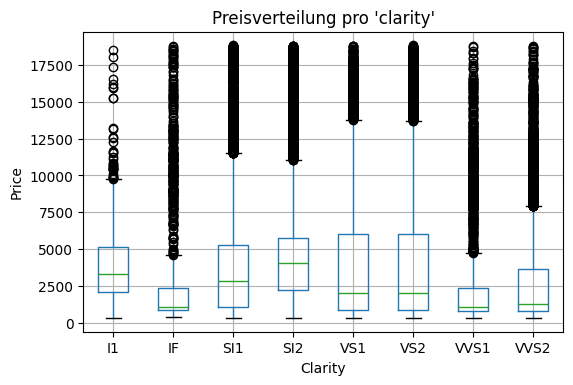

In [141]:
import matplotlib.pyplot as plt

# Boxplot für Preis pro `cut`
df.boxplot(column=['price'], by='cut', figsize=(6, 4))
plt.title("Preisverteilung pro 'cut'")
plt.suptitle("")  # Entfernt den Standardtitel
plt.xlabel("Cut")
plt.ylabel("Price")
plt.show()

# Boxplot für Preis pro `color`
df.boxplot(column=['price'], by='color', figsize=(6, 4))
plt.title("Preisverteilung pro 'color'")
plt.suptitle("")
plt.xlabel("Color")
plt.ylabel("Price")
plt.show()

# Boxplot für Preis pro `clarity`
df.boxplot(column=['price'], by='clarity', figsize=(6, 4))
plt.title("Preisverteilung pro 'clarity'")
plt.suptitle("")
plt.xlabel("Clarity")
plt.ylabel("Price")
plt.show()


<Figure size 600x400 with 0 Axes>

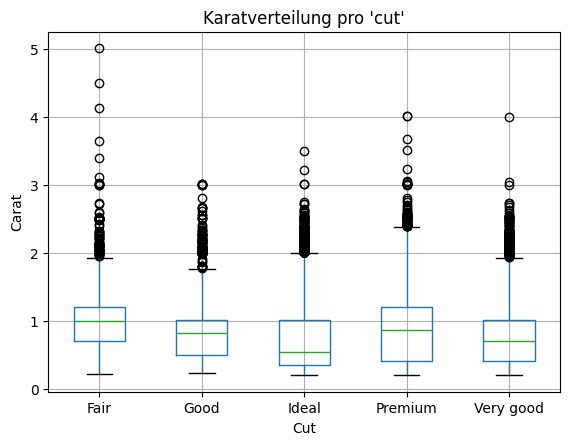

<Figure size 600x400 with 0 Axes>

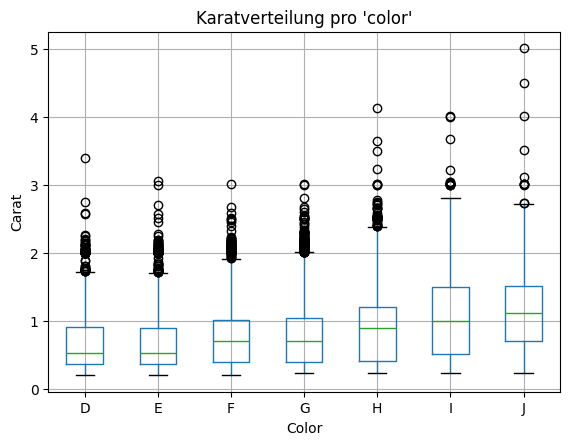

<Figure size 600x400 with 0 Axes>

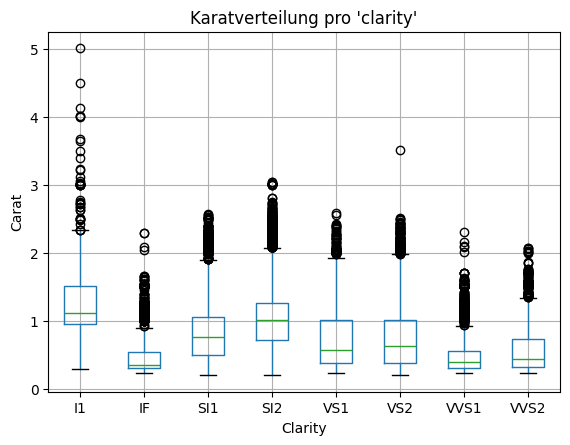

In [142]:
import matplotlib.pyplot as plt

# Boxplot für `carat` vs. `cut`
plt.figure(figsize=(6, 4))
df.boxplot(column=['carat'], by='cut')
plt.title("Karatverteilung pro 'cut'")
plt.suptitle("")
plt.xlabel("Cut")
plt.ylabel("Carat")
plt.show()

# Boxplot für `carat` vs. `color`
plt.figure(figsize=(6, 4))
df.boxplot(column=['carat'], by='color')
plt.title("Karatverteilung pro 'color'")
plt.suptitle("")
plt.xlabel("Color")
plt.ylabel("Carat")
plt.show()

# Boxplot für `carat` vs. `clarity`
plt.figure(figsize=(6, 4))
df.boxplot(column=['carat'], by='clarity')
plt.title("Karatverteilung pro 'clarity'")
plt.suptitle("")
plt.xlabel("Clarity")
plt.ylabel("Carat")
plt.show()





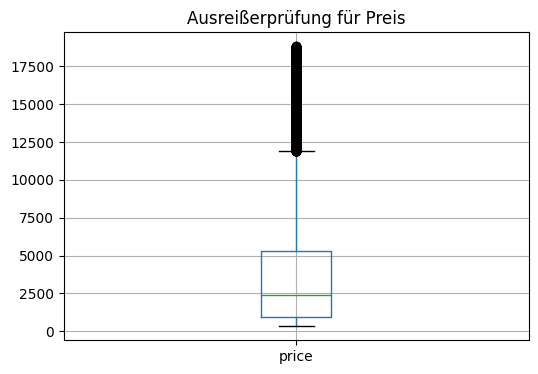

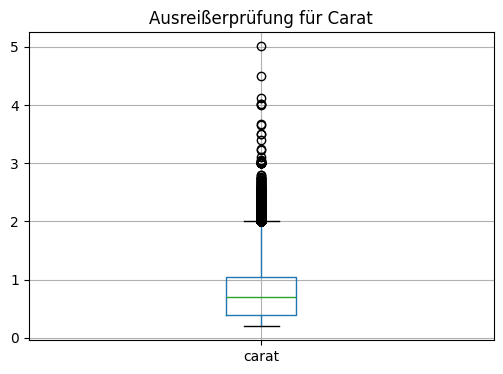

In [143]:
# Boxplot für Ausreißer
df.boxplot(column=['price'], figsize=(6, 4))
plt.title("Ausreißerprüfung für Preis")
plt.show()

df.boxplot(column=['carat'], figsize=(6, 4))
plt.title("Ausreißerprüfung für Carat")
plt.show()


In [144]:
# Kopie von der Originaldatei erstellen, bevor man was drauf speichert/ändert
df_cleaned = df.copy()


In [145]:
# IQR-Methode zur Entfernung von Ausreißern
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Grenzen definieren
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Entferne Ausreißer
df_cleaned = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]




In [146]:
print("Anzahl der Zeilen vor der Bereinigung:", len(df))
print("Anzahl der Zeilen nach der Bereinigung:", len(df_cleaned))


Anzahl der Zeilen vor der Bereinigung: 53940
Anzahl der Zeilen nach der Bereinigung: 50400


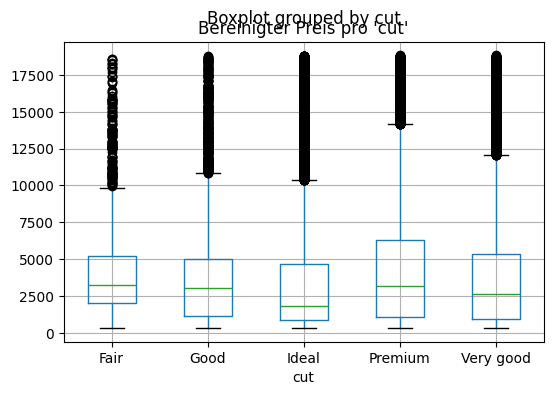

In [147]:
df.boxplot(column=['price'], by='cut', figsize=(6, 4))
plt.title("Bereinigter Preis pro 'cut'")
plt.show()


In [148]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


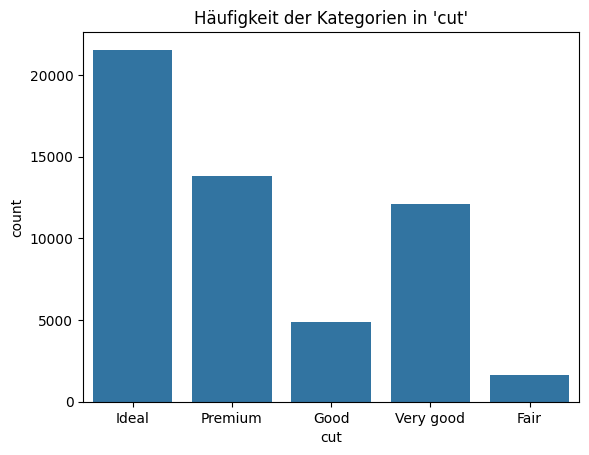

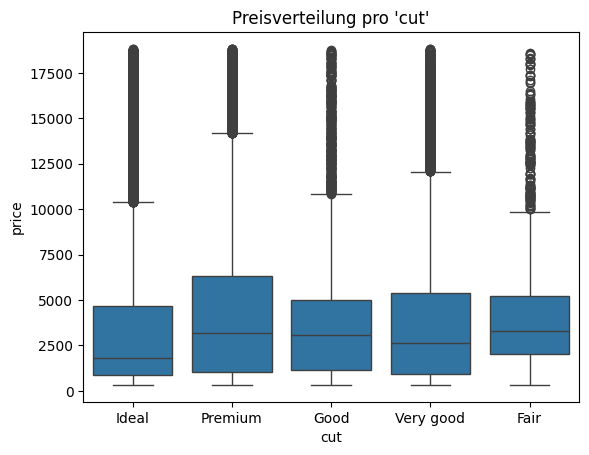

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt

# Barplot für `cut`
sns.countplot(data=df, x='cut')
plt.title("Häufigkeit der Kategorien in 'cut'")
plt.show()

# Boxplot für Preis pro `cut`
sns.boxplot(data=df, x='cut', y='price')
plt.title("Preisverteilung pro 'cut'")
plt.show()


In [150]:
# Datei speichern
df_cleaned.to_csv("diamonds_cleaned.csv", index=False)